In [2]:
import sqlite3
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic
%matplotlib inline
colnames = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']
data = pd.read_csv('Data/adult.data', sep=", ", names=colnames, header=None, index_col=False)
data.replace("?", float("nan"), inplace=True)
data.dropna(inplace=True)

# create mappings for education
education_mapping = data[['education', 'education_num']].drop_duplicates().sort_values(by='education_num', ascending=True)
print(education_mapping)

C:\Users\Kathy\AppData\Local\Temp\ipykernel_14672\728553295.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv('Data/adult.data', sep=", ", names=colnames, header=None, index_col=False)


        education  education_num
224     Preschool              1
416       1st-4th              2
56        5th-6th              3
15        7th-8th              4
6             9th              5
219          10th              6
3            11th              7
415          12th              8
2         HS-grad              9
10   Some-college             10
48      Assoc-voc             11
13     Assoc-acdm             12
0       Bachelors             13
5         Masters             14
52    Prof-school             15
20      Doctorate             16


In [3]:
# clean data/change data types:
# data.age
data.workclass = data.workclass.astype('category')
# data.fnlwgt
data.education = data.education.astype('category')
# data.education_num
data.marital_status = data.marital_status.astype('category')
data.occupation = data.occupation.astype('category')
data.relationship = data.relationship.astype('category')
data.race = data.race.astype('category')
data.sex = data.sex.astype('category')
# data.capital_gain
# data.capital_loss
# data.hours_per_week
data.native_country = data.native_country.astype('category')
data.income = data.income.astype('category')


In [4]:
# fully cleaning the data, looking through the data, converting it to integer categorical data, and 
# producing 2 visualizations should be sufficient progress for halfway through the course.

In [5]:
print("Count of income >50k: " + str(len(data[data.income == '>50K'])))
print("Count of income <=50k: " + str(len(data[data.income == '<=50K'])))

Count of income >50k: 7508
Count of income <=50k: 22654


In [6]:
# print(data.workclass.unique())
# print(data.education.unique())
# print(data.marital_status.unique())
# print(data.occupation.unique())
# print(data.relationship.unique())
# print(data.race.unique())
# print(data.sex.unique())
# print(data.native_country.unique())
# print(data['50k'].unique())

data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
# visualization for all single variables:

def numerical(col):
    print("For variable " + col)
    print("Min is: " + str(data[col].min()))
    print("Max is: " + str(data[col].max()))
    print("Mean is: " + str(data[col].mean()))
    print("Std Dev is: " + str(data[col].std()))
    
    # countplot of all values based on income
    fig1 = plt.figure(figsize=(20,6))
    ax1 = sns.countplot(x=col, hue='income', data=data)
    plt.title(col)
    
    # kdeplot for all values based on salary
    fig2, ax2 = plt.subplots(figsize=(20, 6))
    sns.kdeplot(data[data.income=="<=50K"][col], label='<=50k', fill=True, ax=ax2)
    sns.kdeplot(data[data.income==">50K"][col], label='>50k', fill=True, ax=ax2)
    ax2.legend()
    plt.title(col)
    plt.tight_layout()
    
    # scatterplot vs income
    fig3, ax3 = plt.subplots(ncols=2, nrows=1, figsize=(20,6))
    ax3[0].boxplot(data[data.income=='>50K'][col])
    ax3[0].set_title(col+" >50K")
    ax3[1].boxplot(data[data.income=='<=50K'][col])
    ax3[1].set_title(col+" <=50K")
    plt.show()
    
    
def categorical(col):
    counts = data[col].value_counts()
    print("For variable " + col)
    print(counts)

    # countplot of all values based on income
    fig1 = plt.figure(figsize=(20,6))
    ax1 = sns.countplot(x=col, hue='income', data=data)
    plt.xticks(rotation=90, ha='right', fontsize=11)
    plt.title(col)
    plt.show()
        
    # pie chart of all values
    fig2 = plt.figure(figsize=(15,5))
    ax2 = plt.pie(counts, labels = counts.index, autopct='%.0f%%')
    plt.title(col)
    plt.show()
    
    # matrix/heatplot vs income
    fig3, ax3 = plt.subplots(figsize=(15,5))
    mosaic(data, [col, 'income'], ax=ax3, axes_label=False)
    plt.title(col)
    plt.show()
    

For variable workclass
Private             22286
Self-emp-not-inc     2499
Local-gov            2067
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Name: workclass, dtype: int64


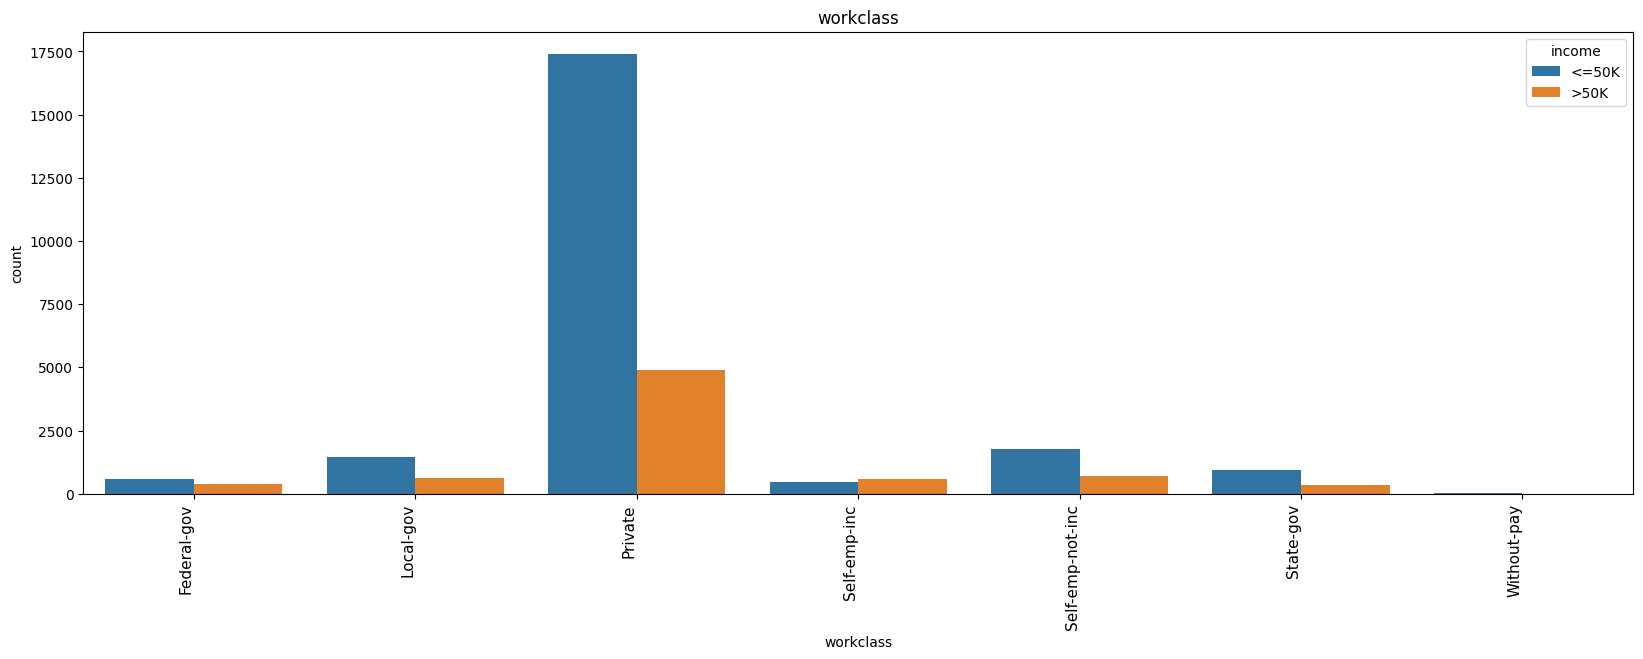

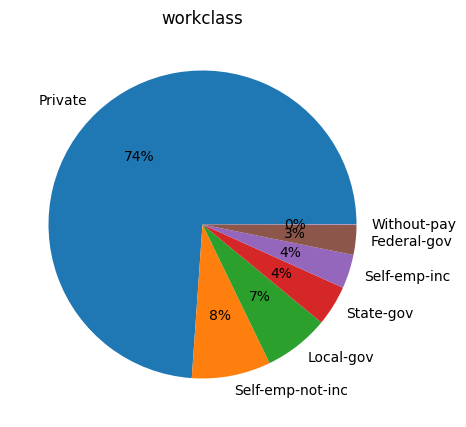

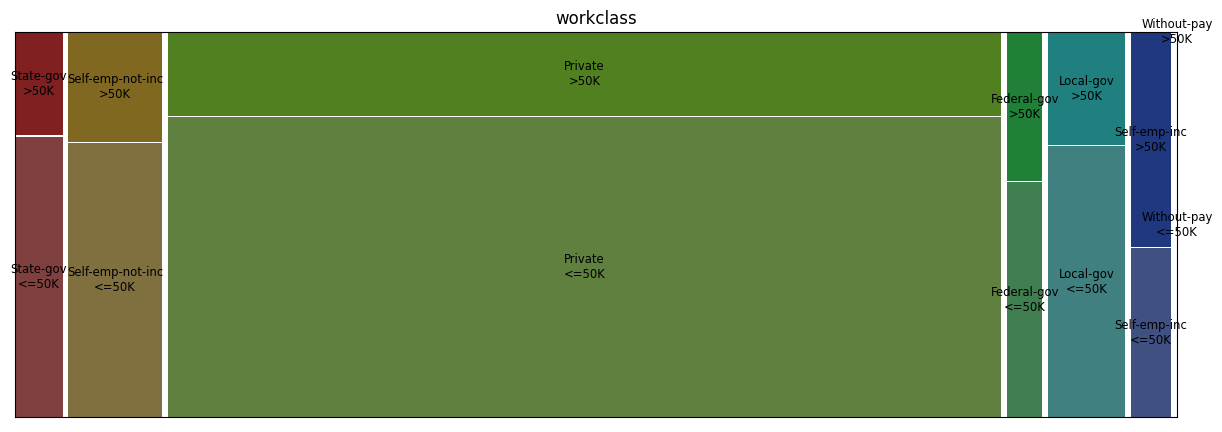

For variable education
HS-grad         9840
Some-college    6678
Bachelors       5044
Masters         1627
Assoc-voc       1307
11th            1048
Assoc-acdm      1008
10th             820
7th-8th          557
Prof-school      542
9th              455
12th             377
Doctorate        375
5th-6th          288
1st-4th          151
Preschool         45
Name: education, dtype: int64


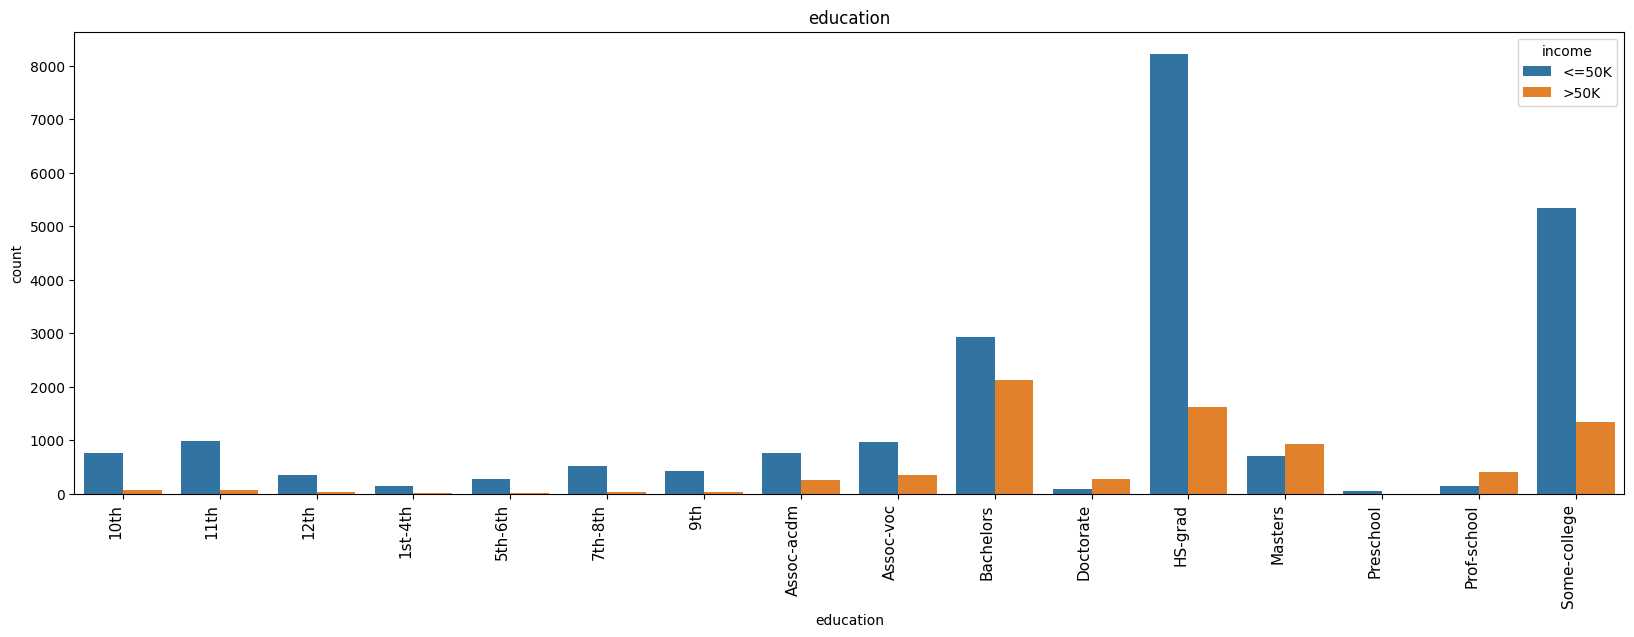

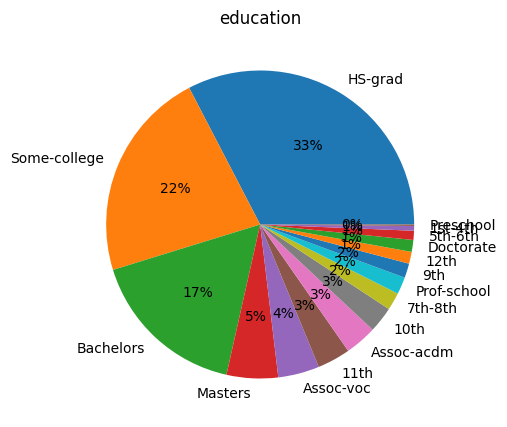

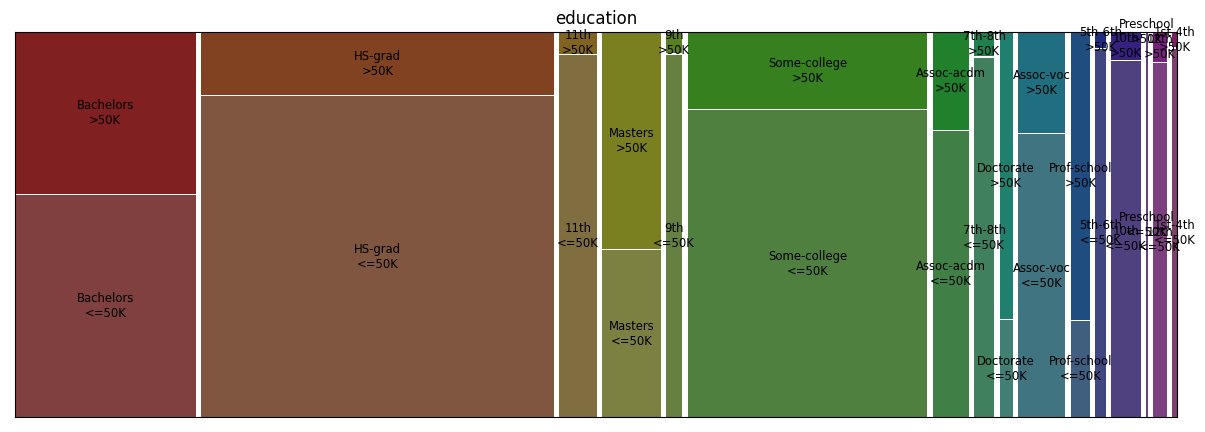

For variable marital_status
Married-civ-spouse       14065
Never-married             9726
Divorced                  4214
Separated                  939
Widowed                    827
Married-spouse-absent      370
Married-AF-spouse           21
Name: marital_status, dtype: int64


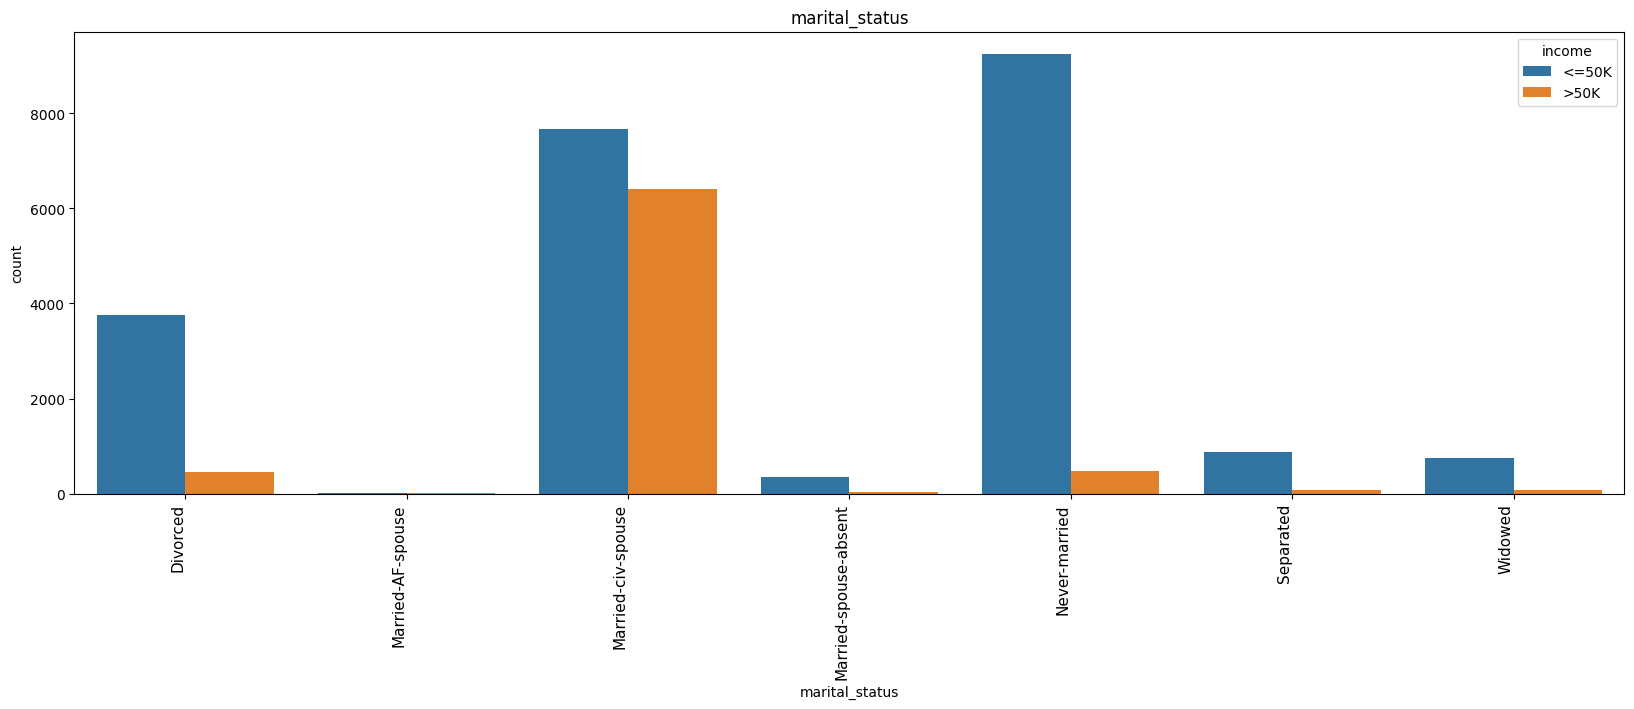

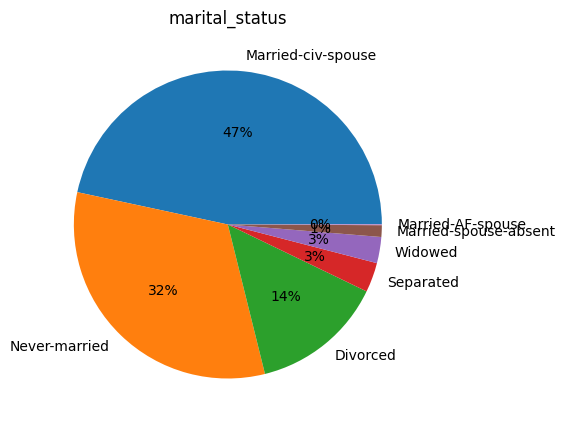

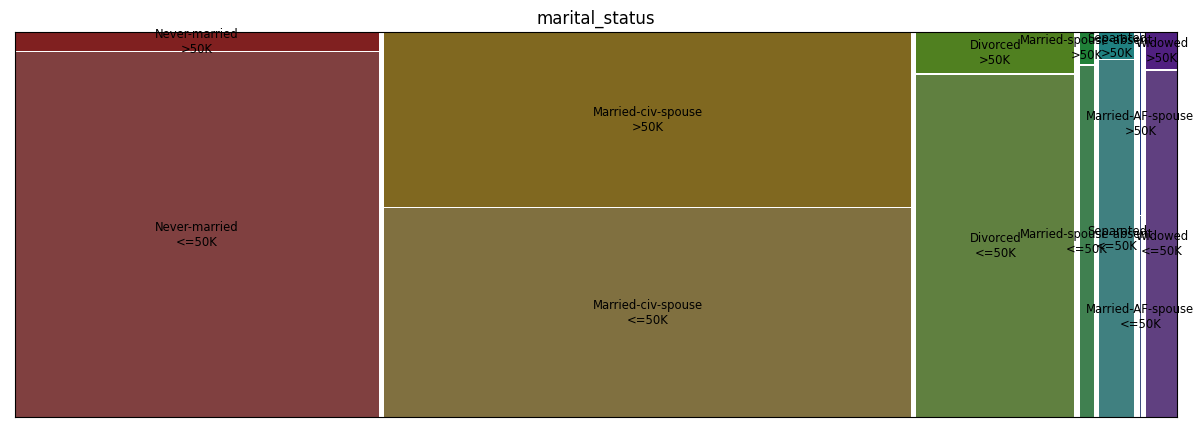

For variable occupation
Prof-specialty       4038
Craft-repair         4030
Exec-managerial      3992
Adm-clerical         3721
Sales                3584
Other-service        3212
Machine-op-inspct    1966
Transport-moving     1572
Handlers-cleaners    1350
Farming-fishing       989
Tech-support          912
Protective-serv       644
Priv-house-serv       143
Armed-Forces            9
Name: occupation, dtype: int64


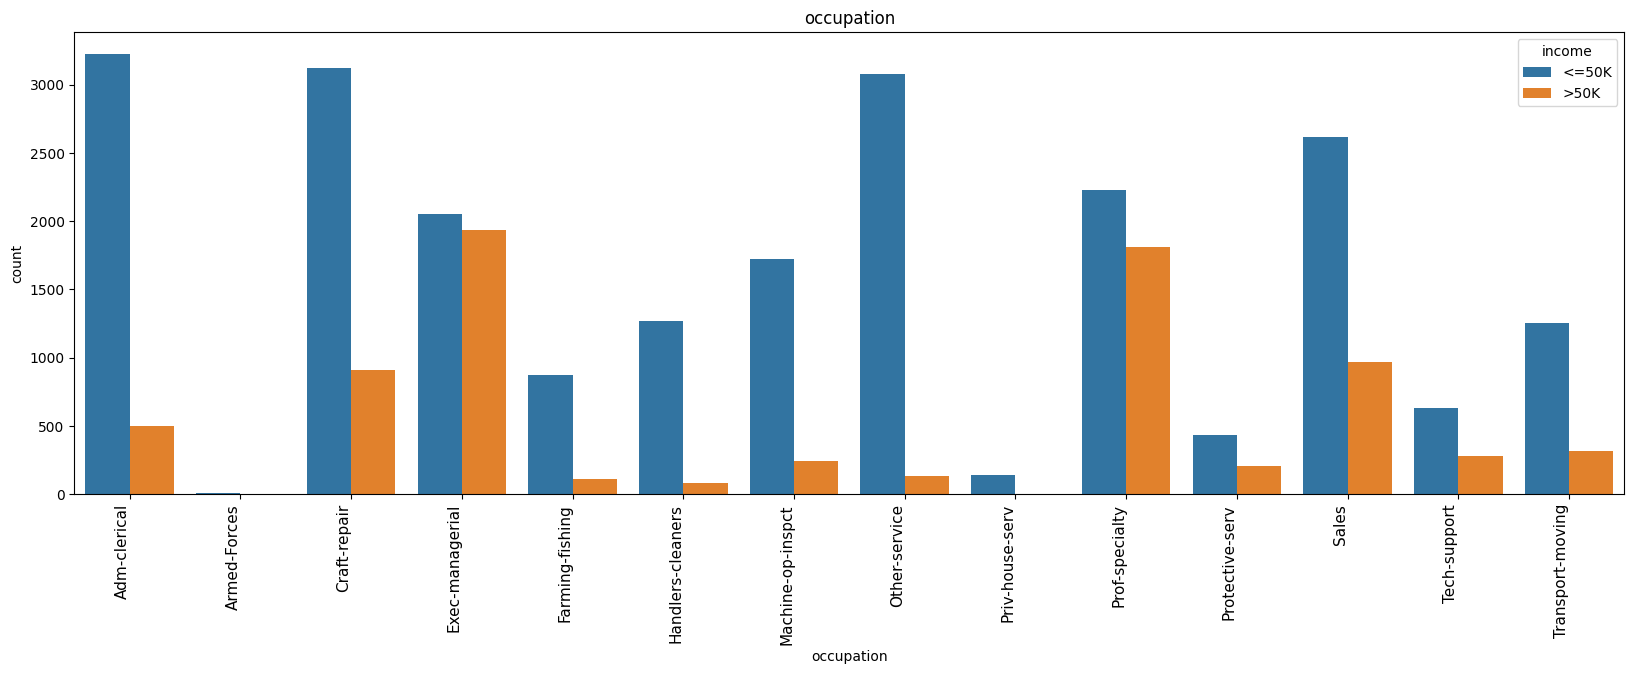

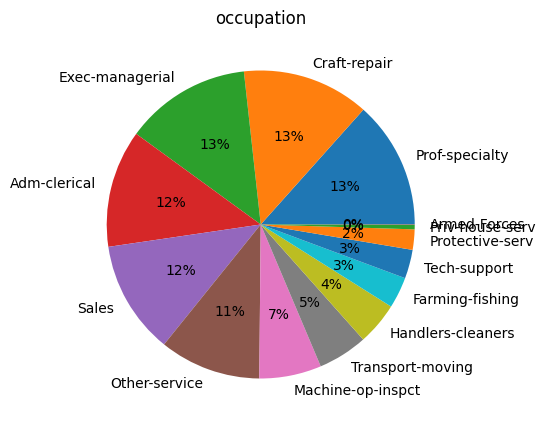

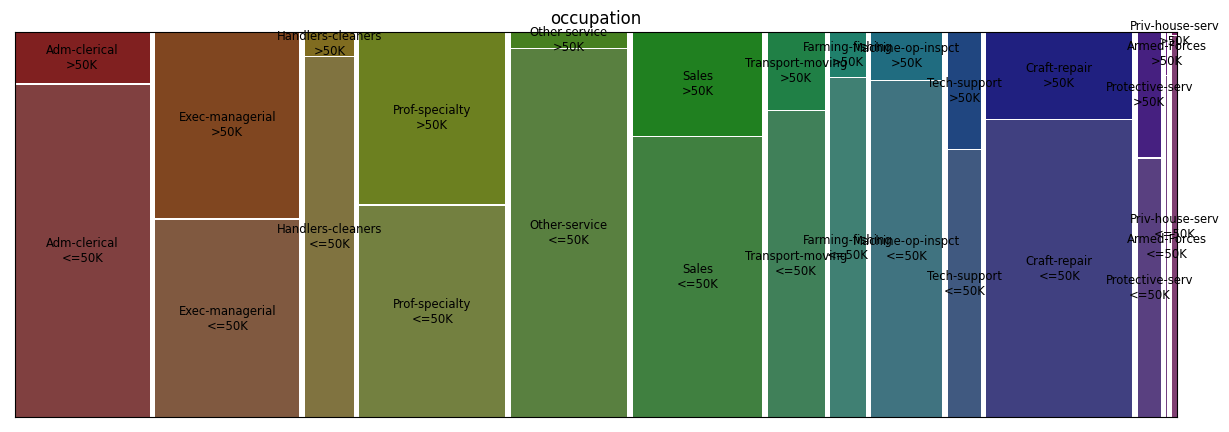

For variable relationship
Husband           12463
Not-in-family      7726
Own-child          4466
Unmarried          3212
Wife               1406
Other-relative      889
Name: relationship, dtype: int64


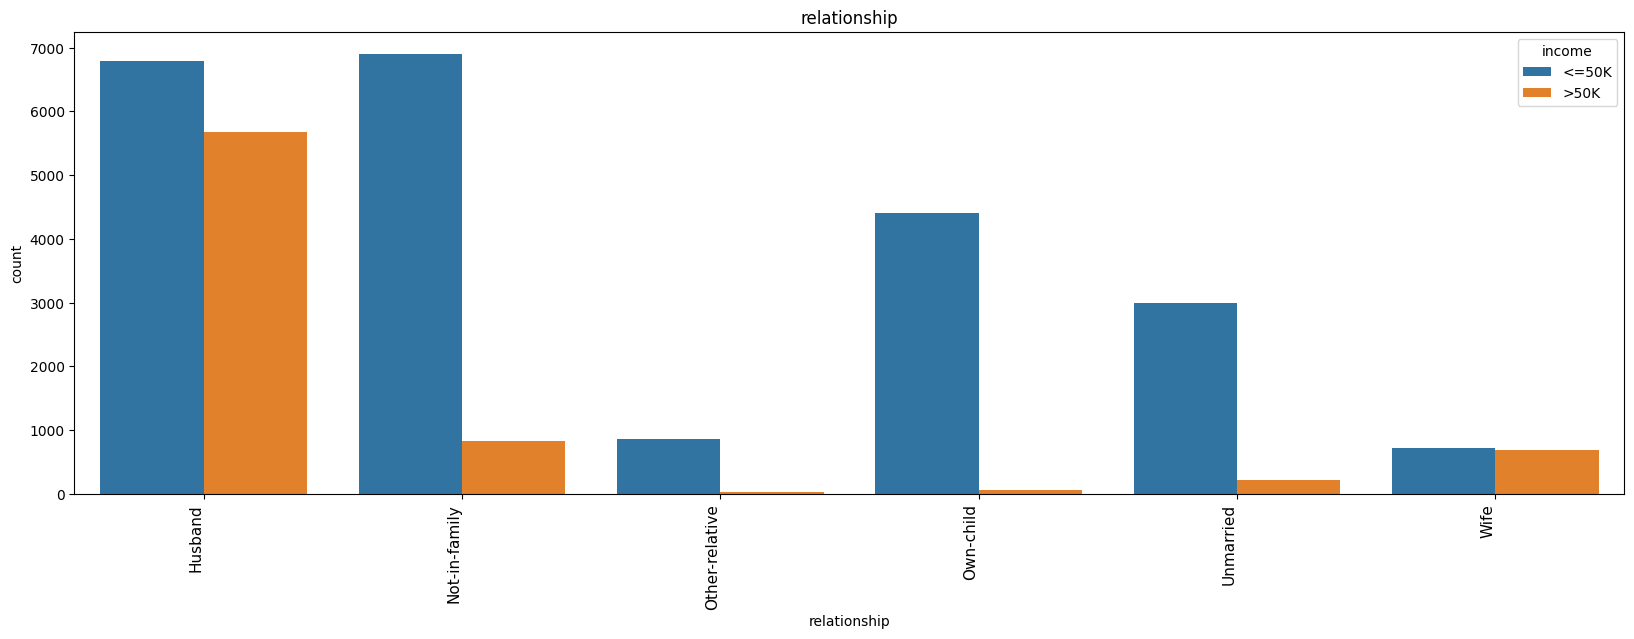

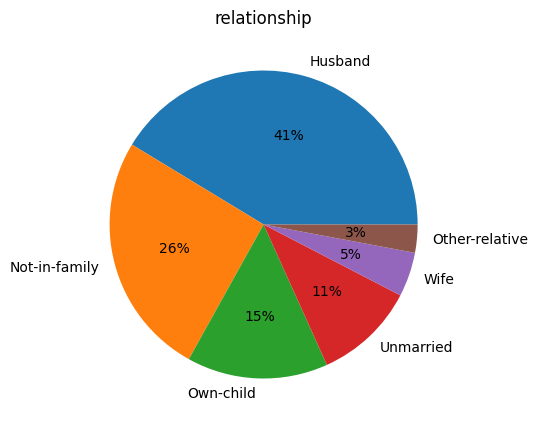

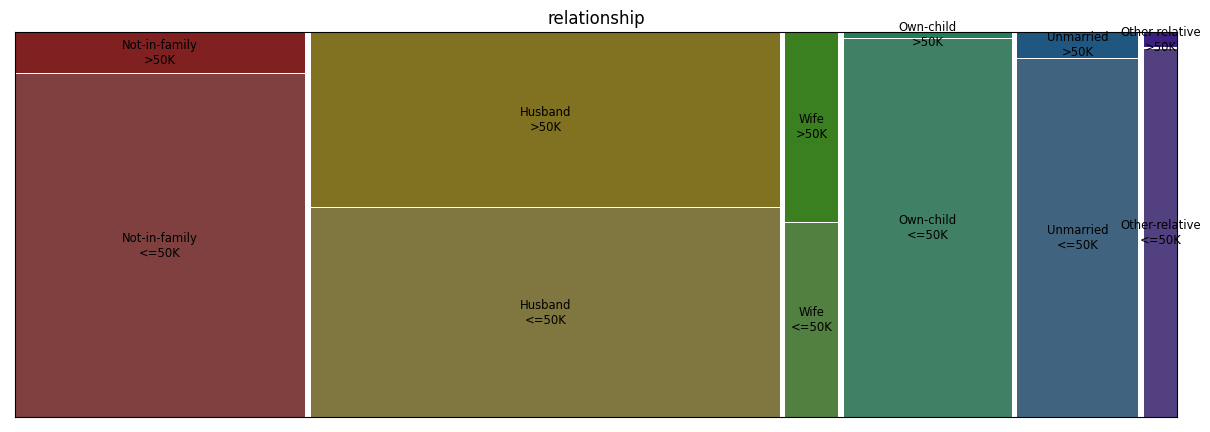

For variable race
White                 25933
Black                  2817
Asian-Pac-Islander      895
Amer-Indian-Eskimo      286
Other                   231
Name: race, dtype: int64


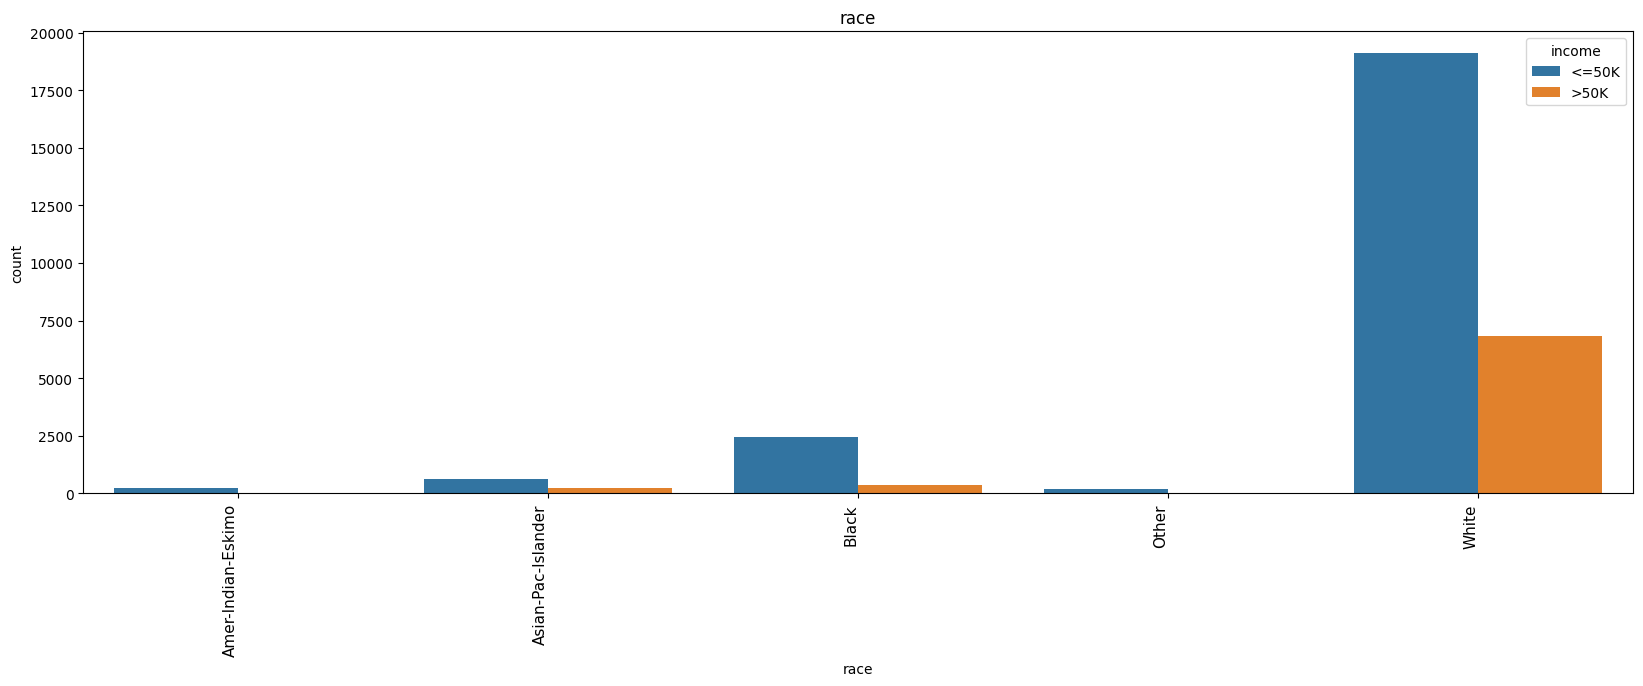

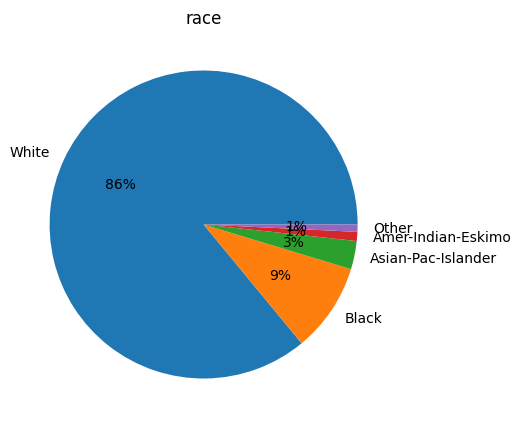

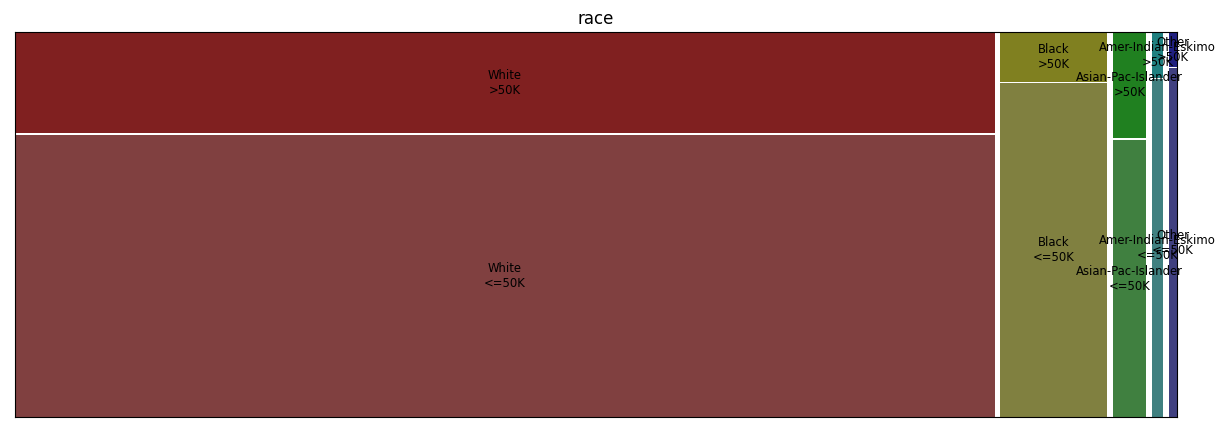

For variable sex
Male      20380
Female     9782
Name: sex, dtype: int64


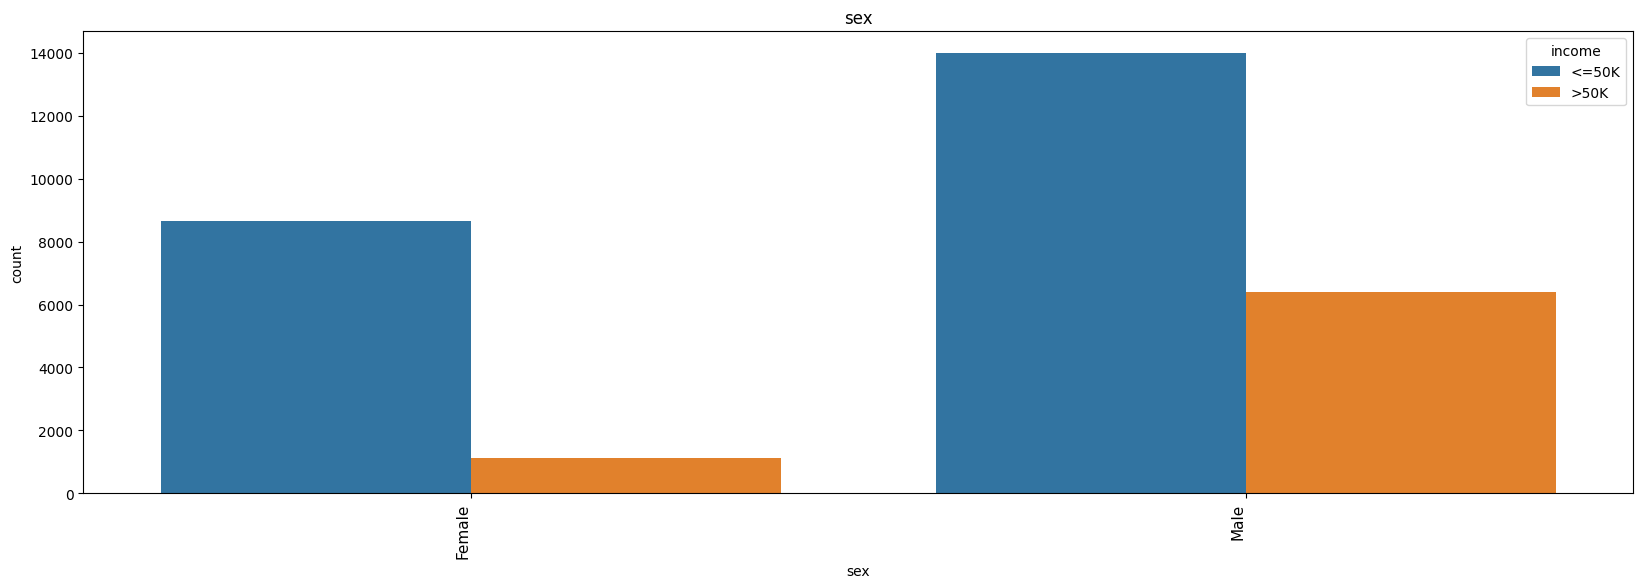

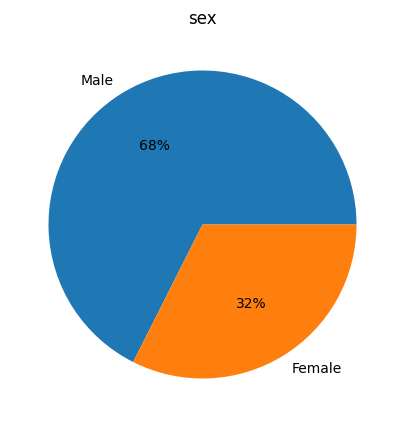

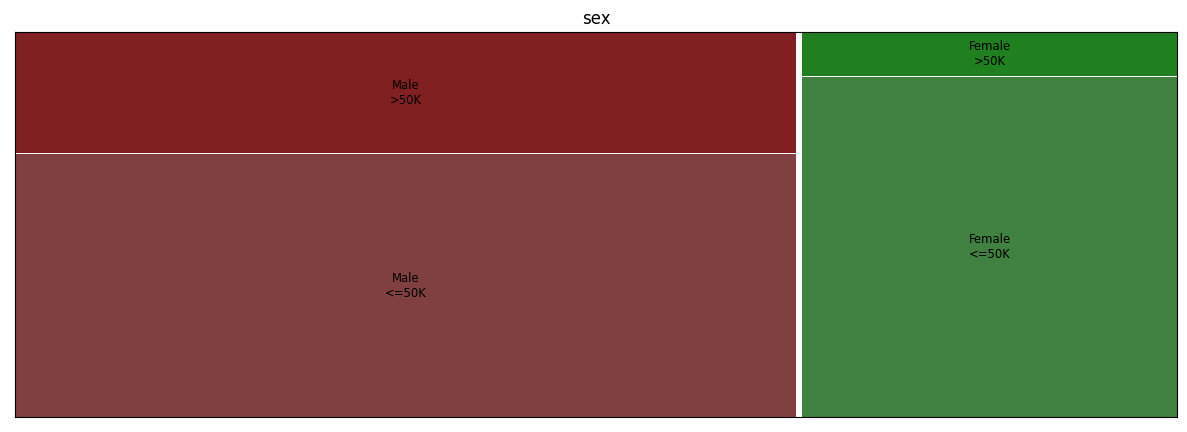

For variable native_country
United-States                 27504
Mexico                          610
Philippines                     188
Germany                         128
Puerto-Rico                     109
Canada                          107
El-Salvador                     100
India                           100
Cuba                             92
England                          86
Jamaica                          80
South                            71
China                            68
Italy                            68
Dominican-Republic               67
Vietnam                          64
Guatemala                        63
Japan                            59
Poland                           56
Columbia                         56
Haiti                            42
Iran                             42
Taiwan                           42
Portugal                         34
Nicaragua                        33
Peru                             30
Greece                           29


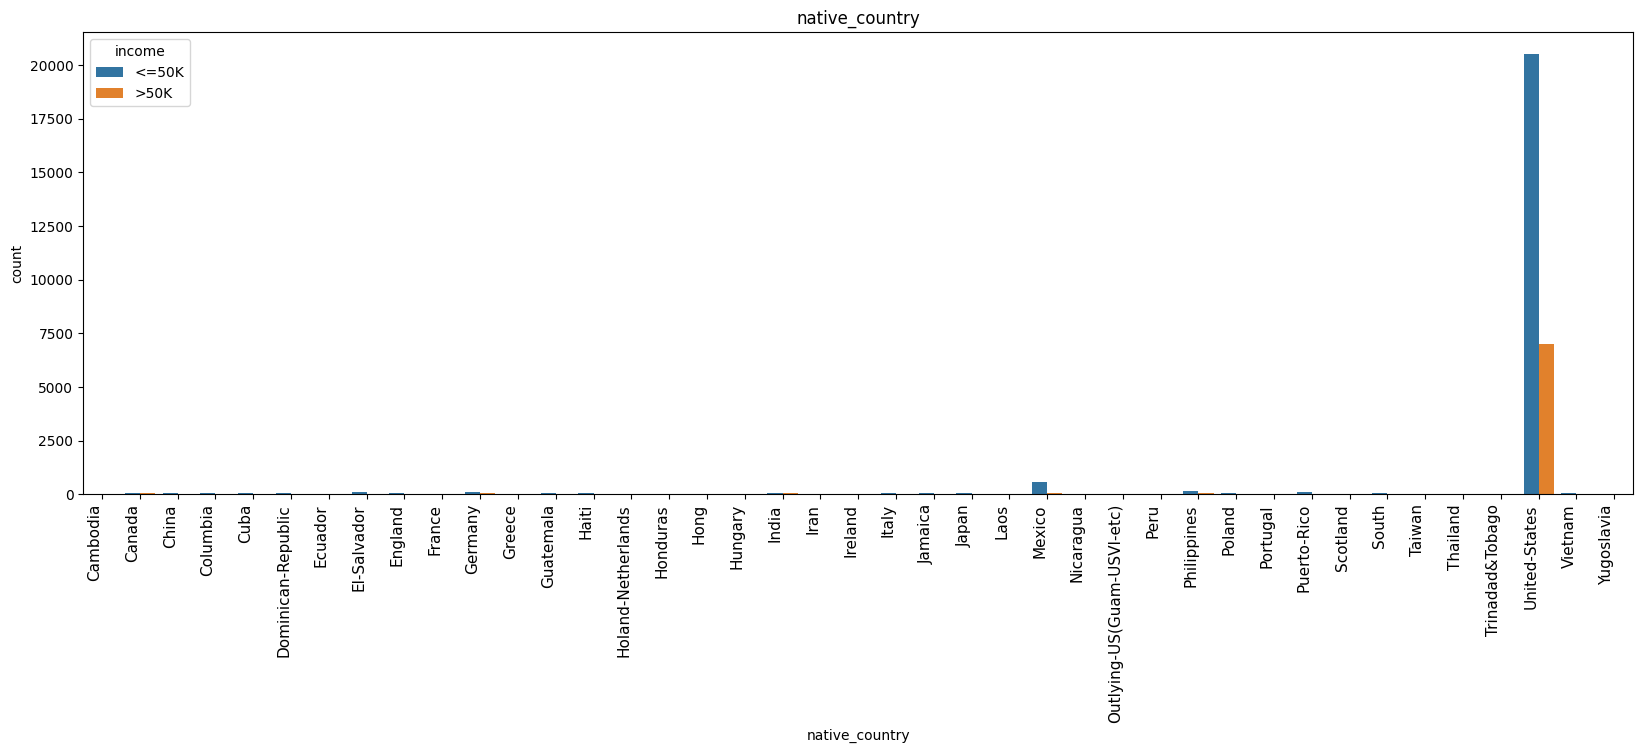

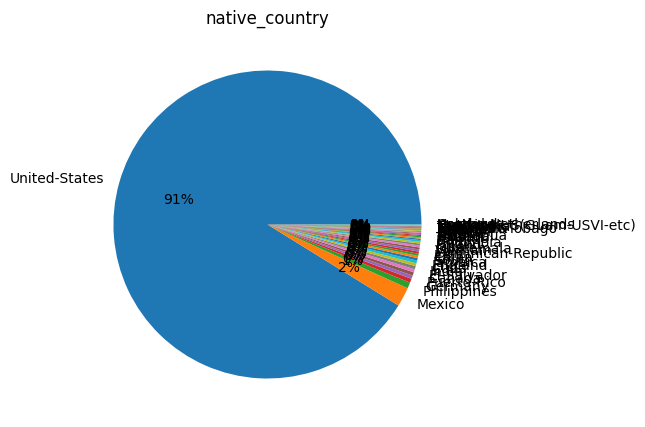

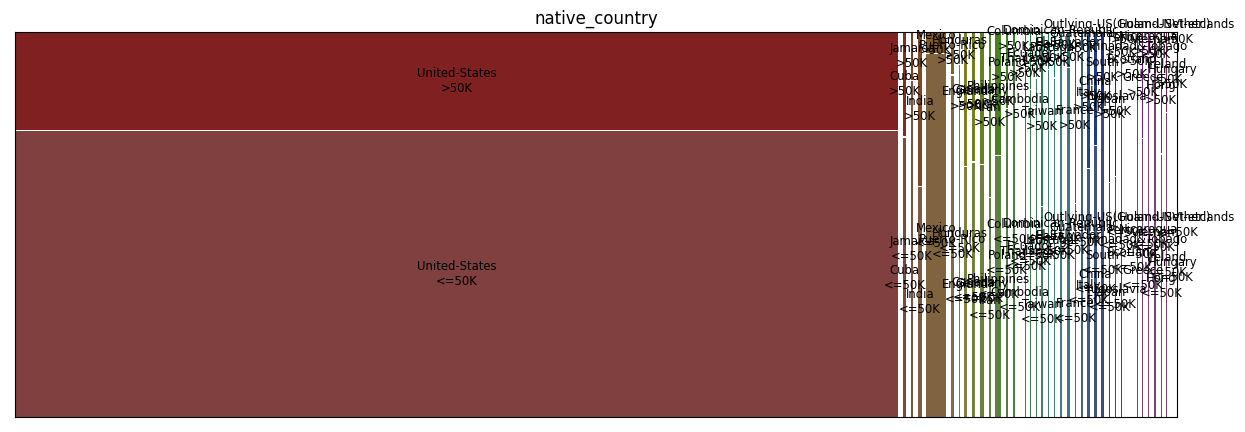

In [157]:
categorical('workclass')
categorical('education')
categorical('marital_status')
categorical('occupation')
categorical('relationship')
categorical('race')
categorical('sex')
categorical('native_country')

For variable age
Min is: 17
Max is: 90
Mean is: 38.437901995888865
Std Dev is: 13.134664776855985


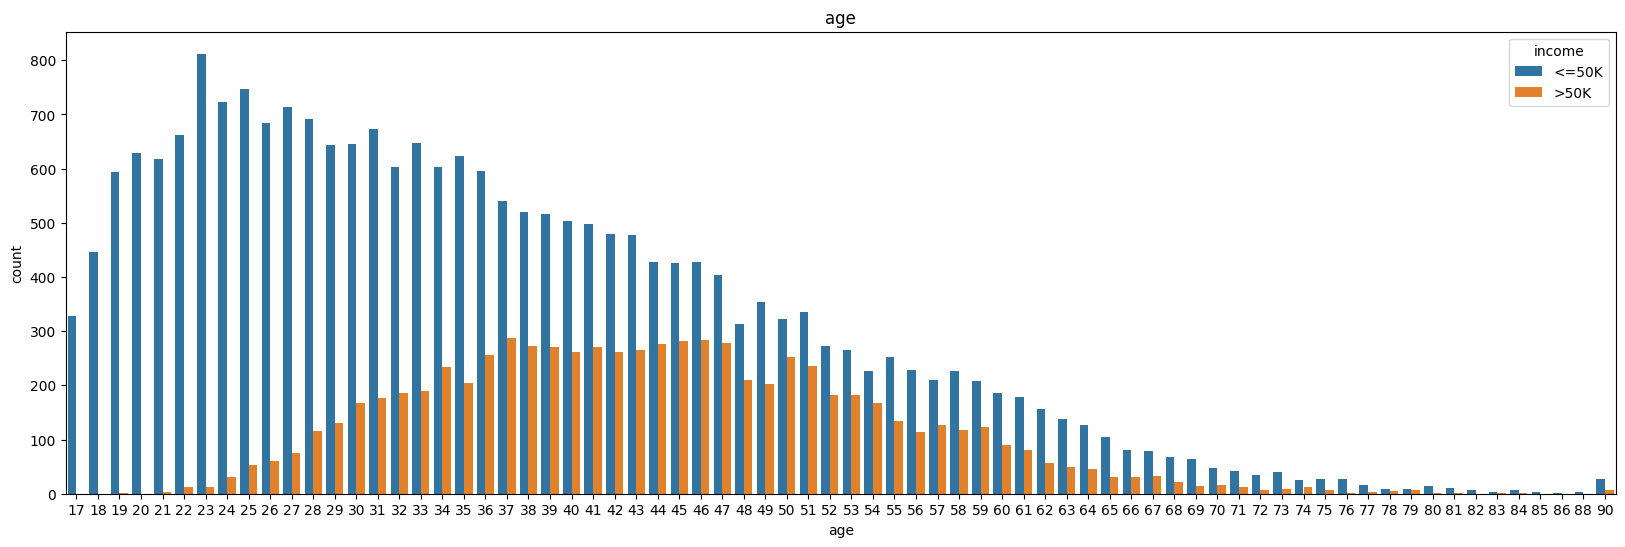

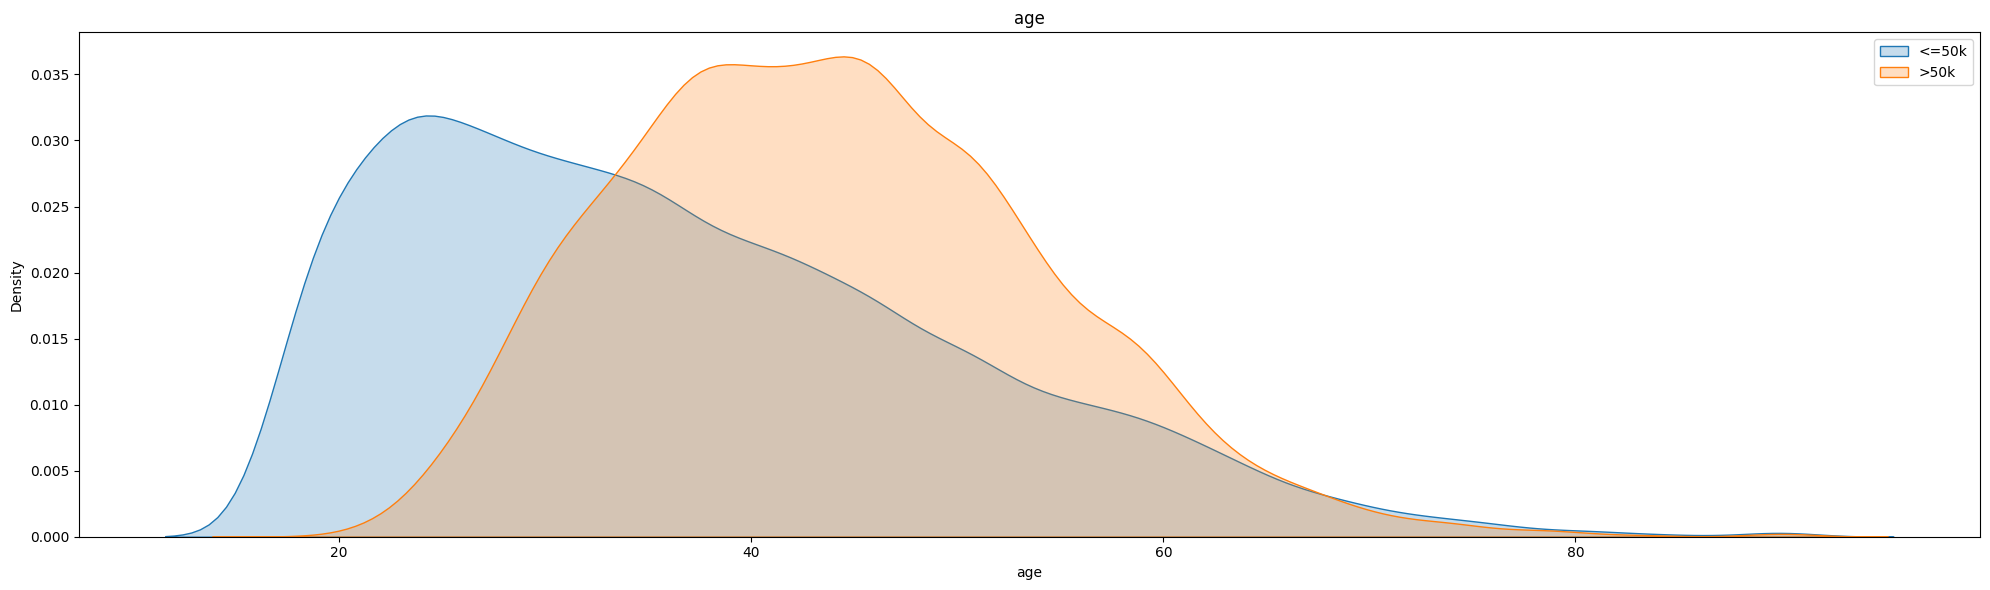

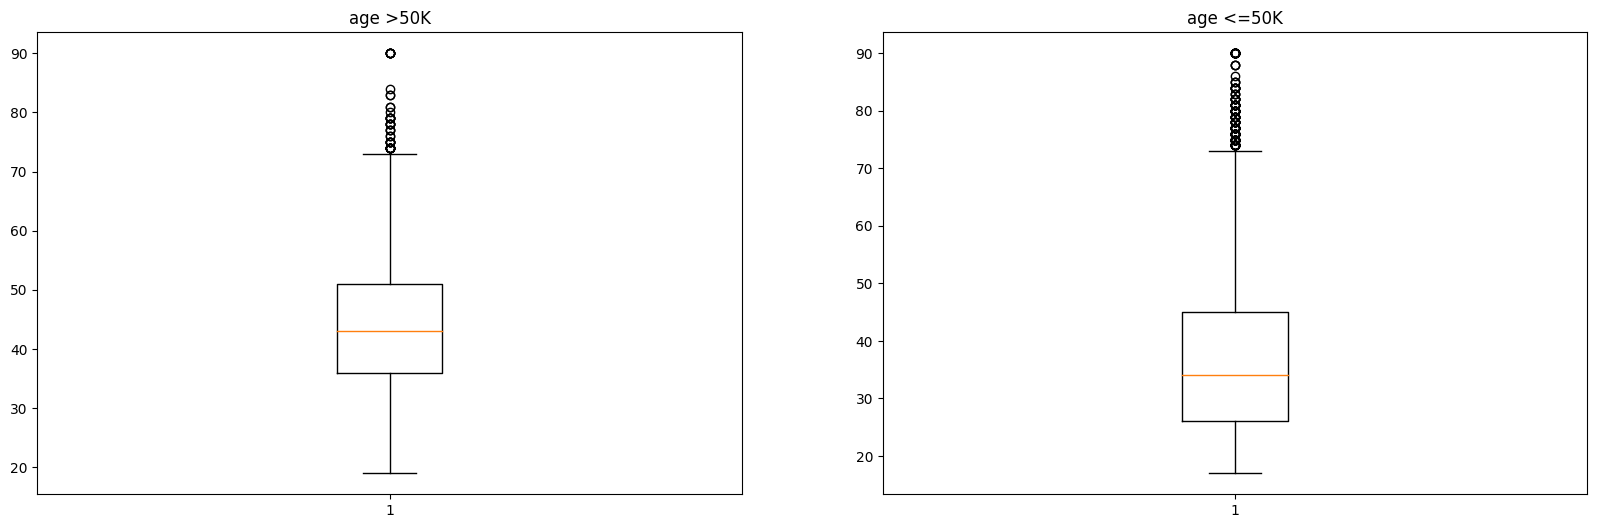

For variable education_num
Min is: 1
Max is: 16
Mean is: 10.12131158411246
Std Dev is: 2.549994918856736


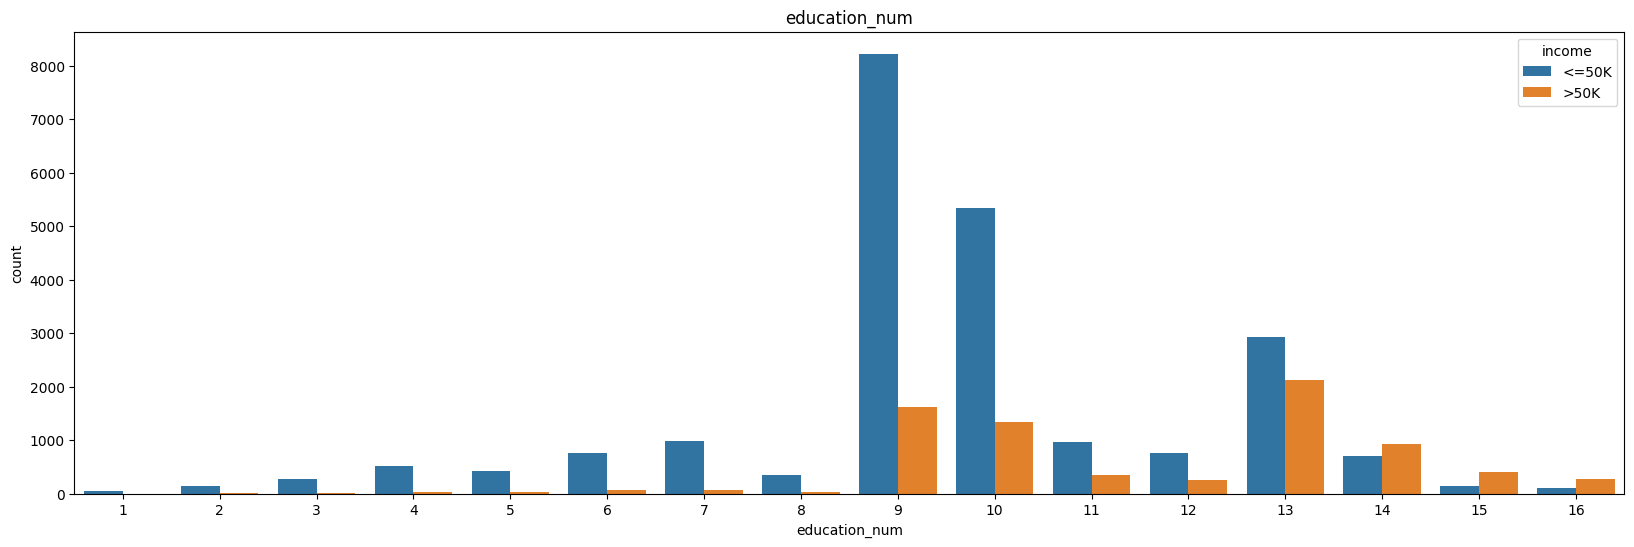

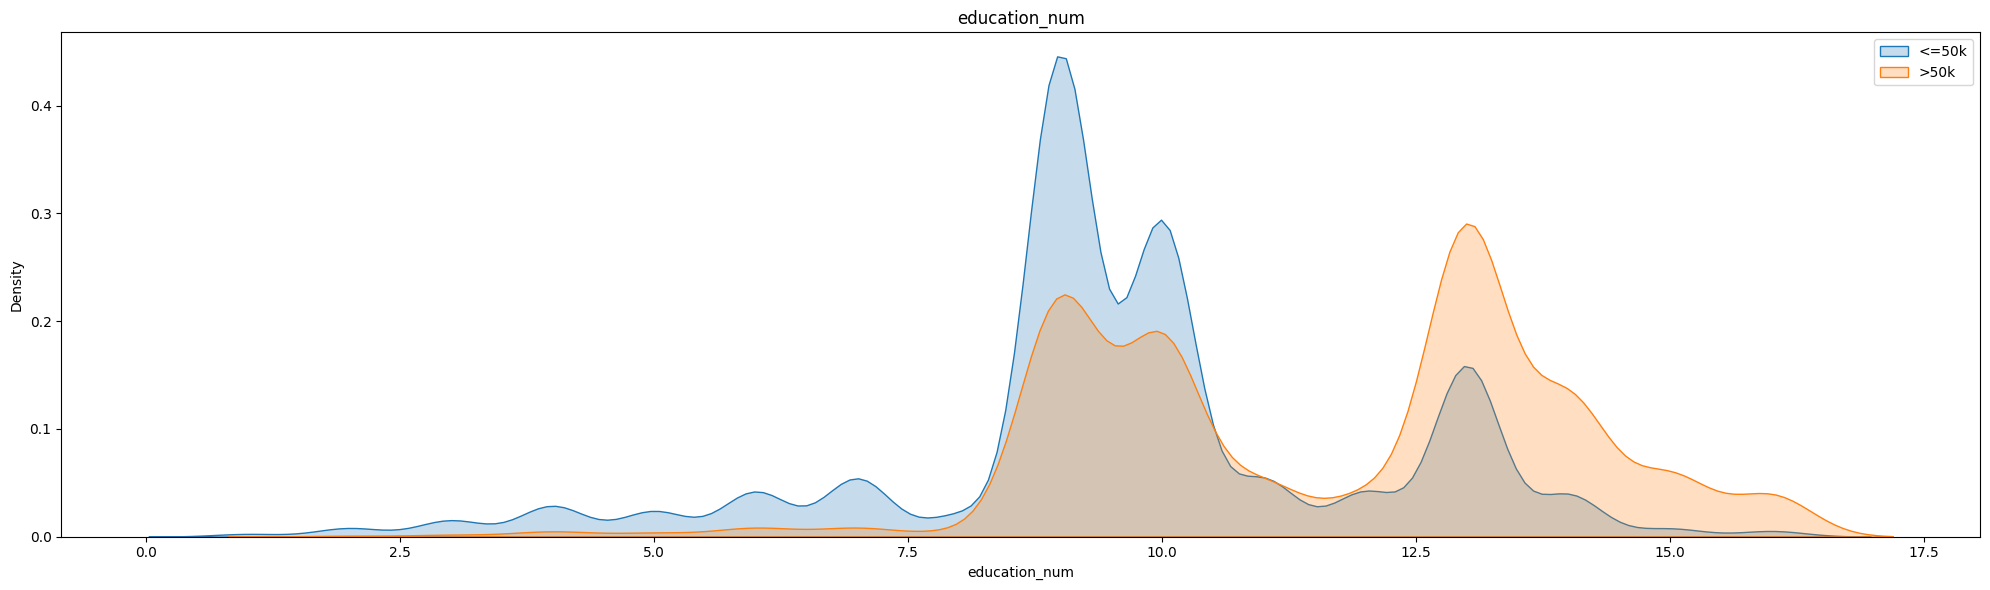

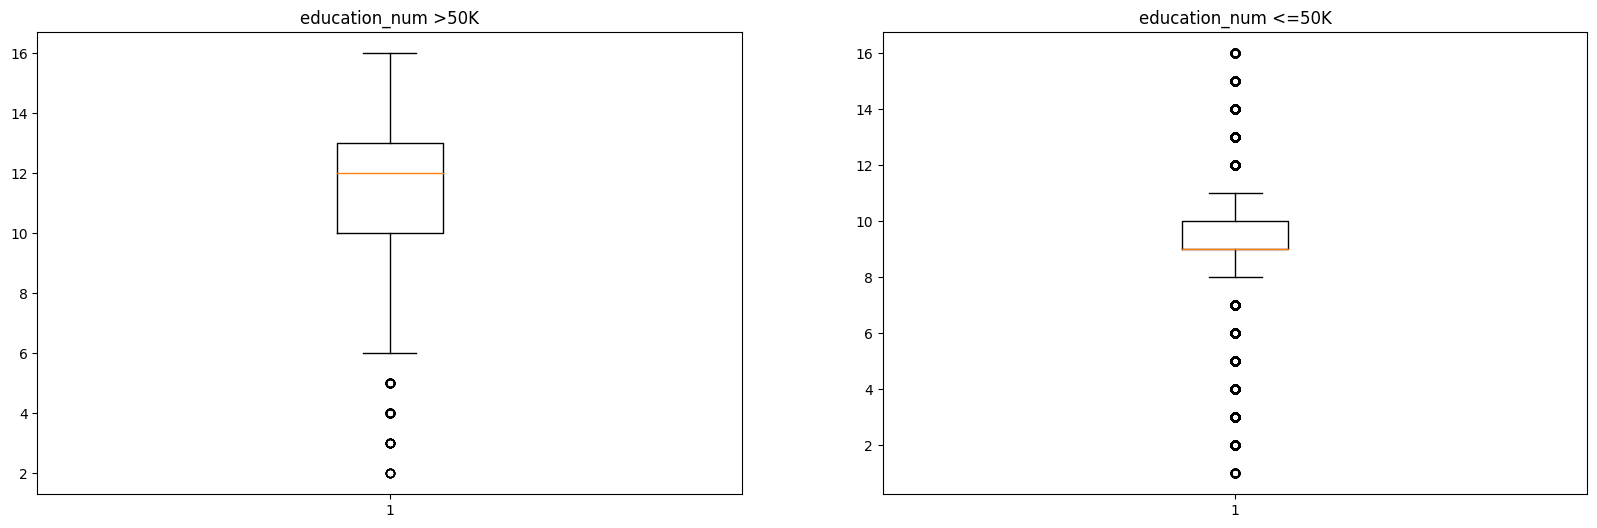

For variable capital_gain
Min is: 0
Max is: 99999
Mean is: 1092.0078575691268
Std Dev is: 7406.346496683503


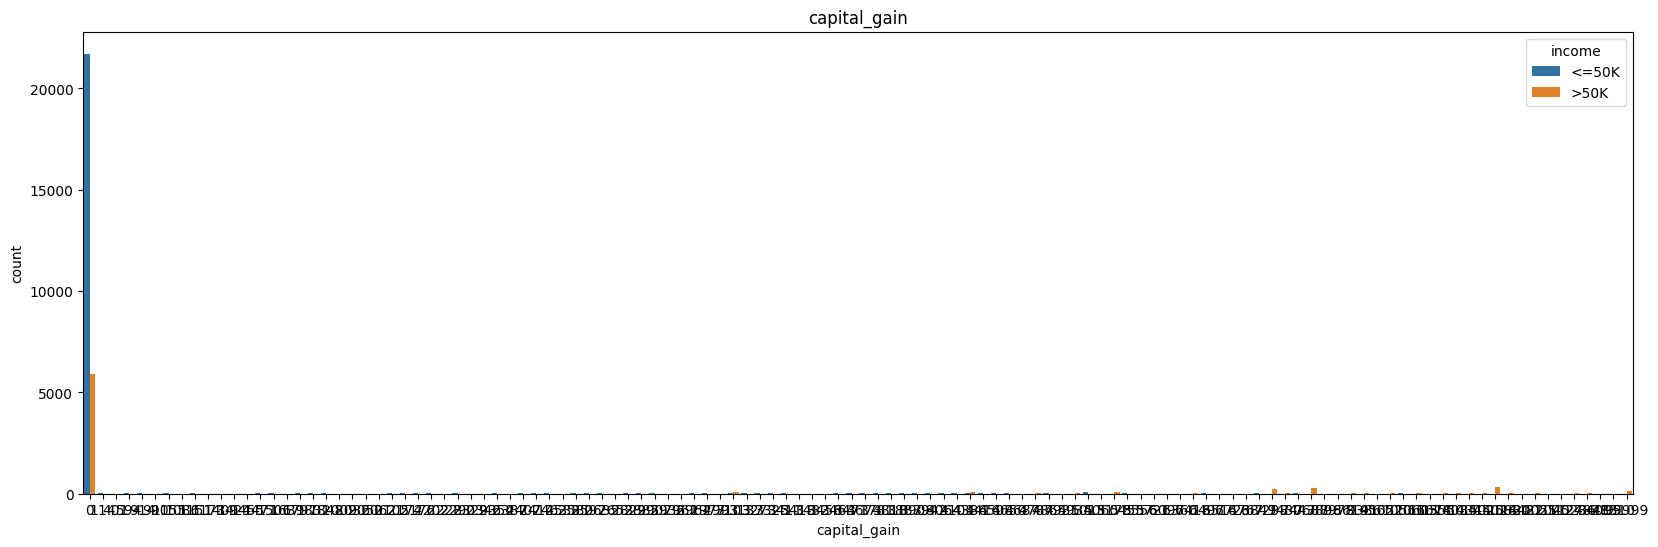

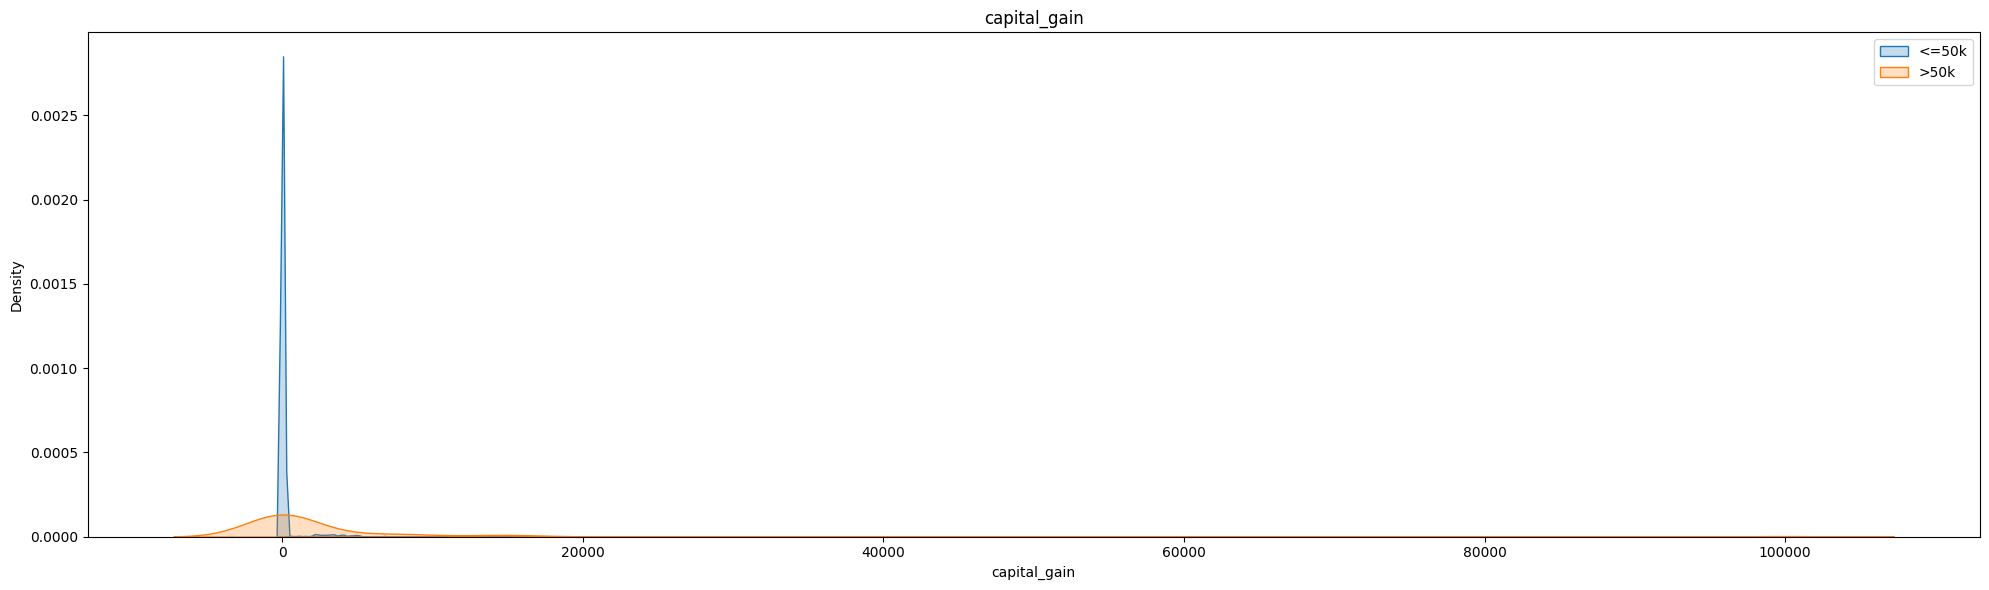

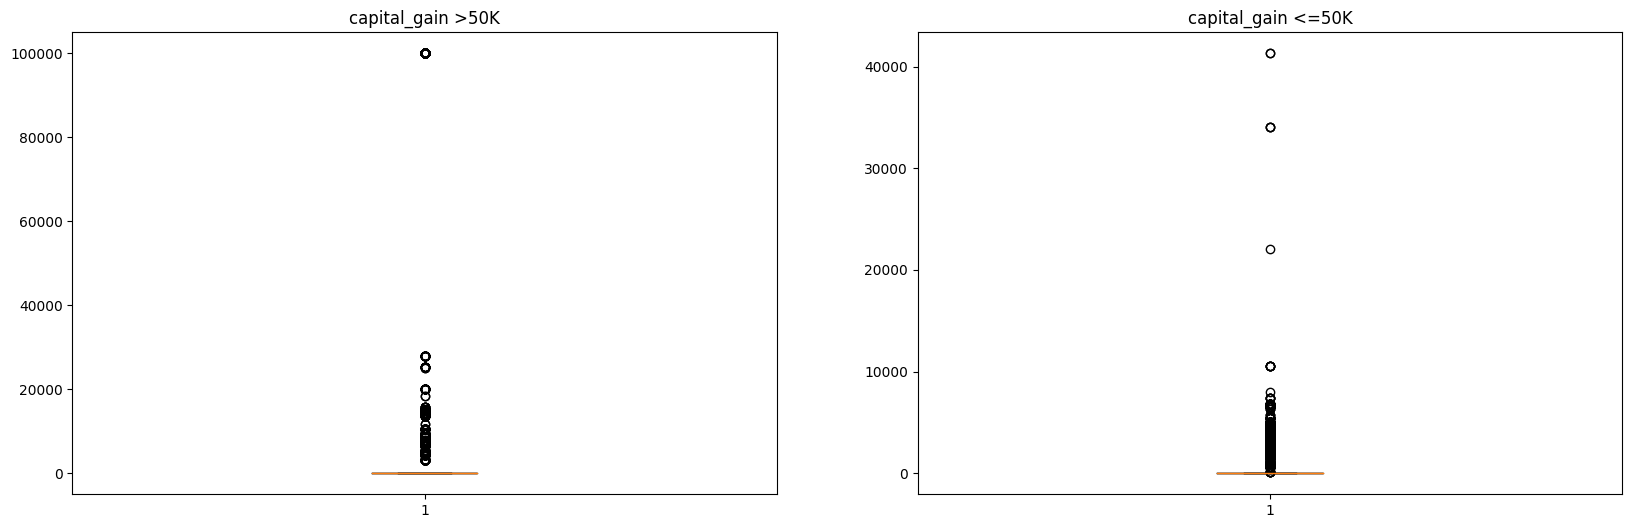

For variable capital_loss
Min is: 0
Max is: 4356
Mean is: 88.37248856176646
Std Dev is: 404.29837048637575


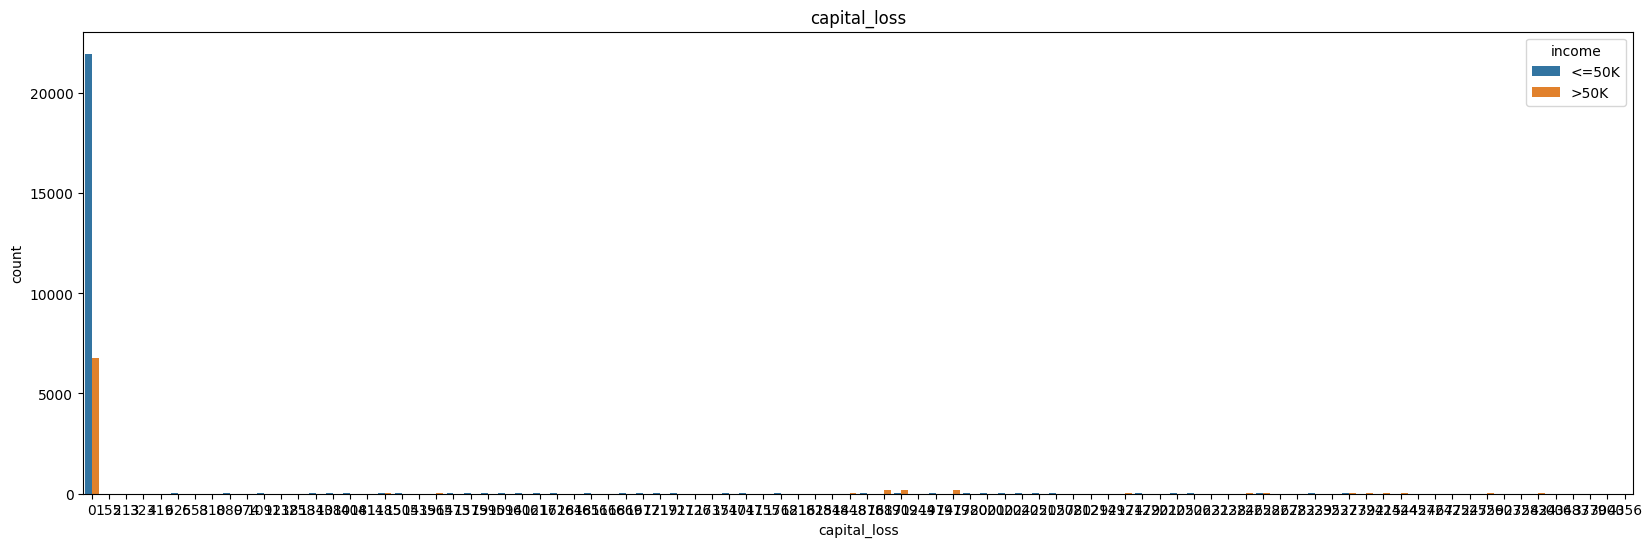

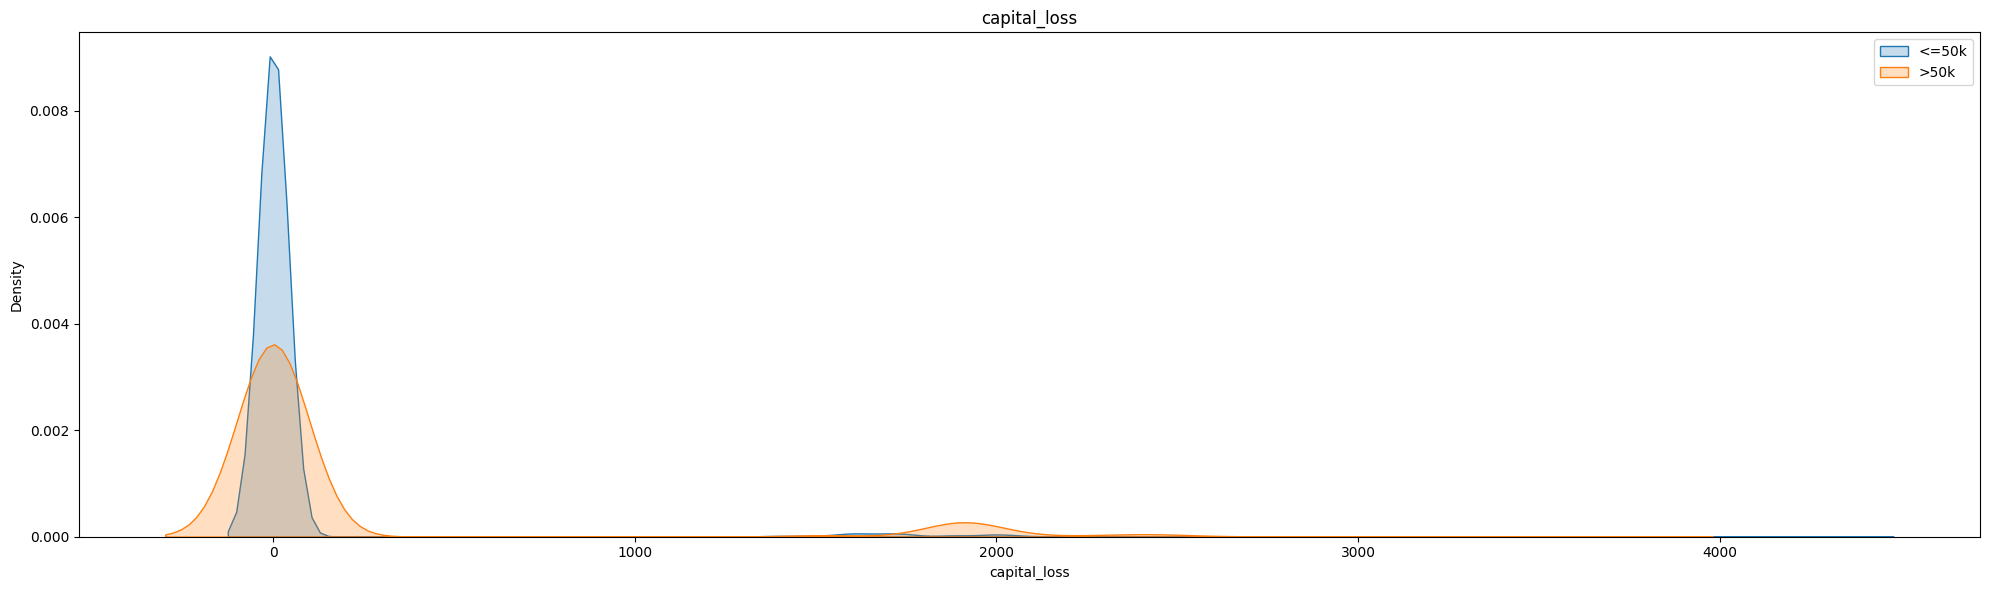

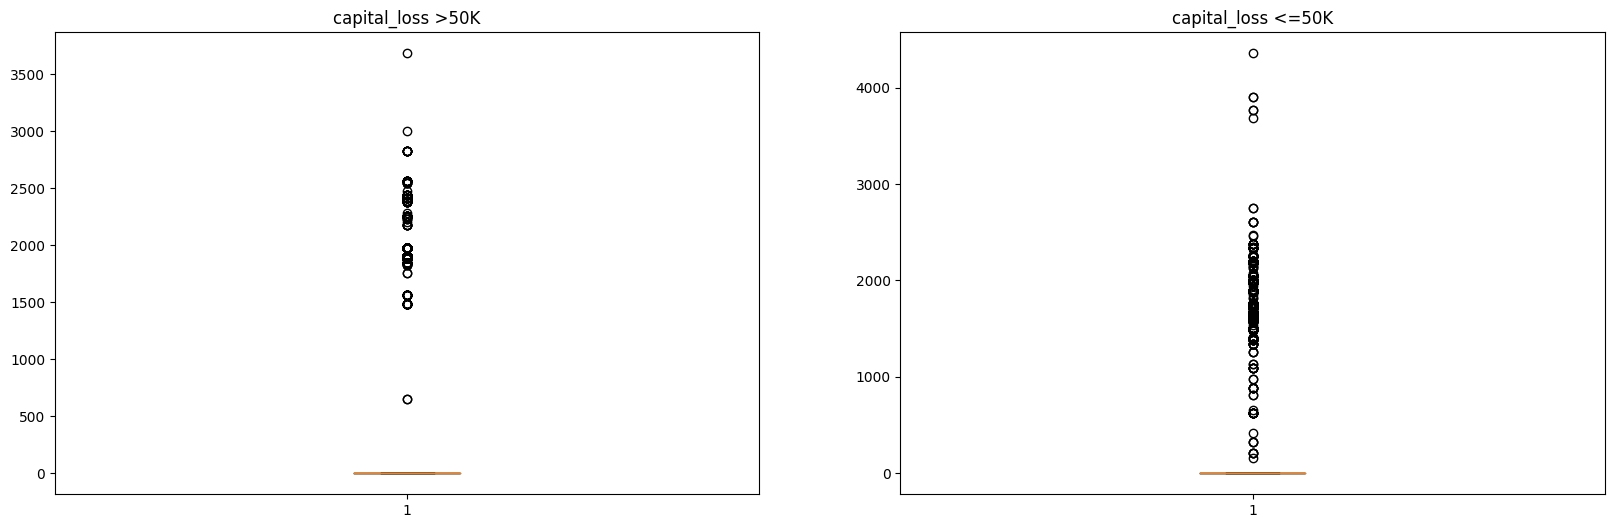

For variable hours_per_week
Min is: 1
Max is: 99
Mean is: 40.93123798156621
Std Dev is: 11.979984229274882


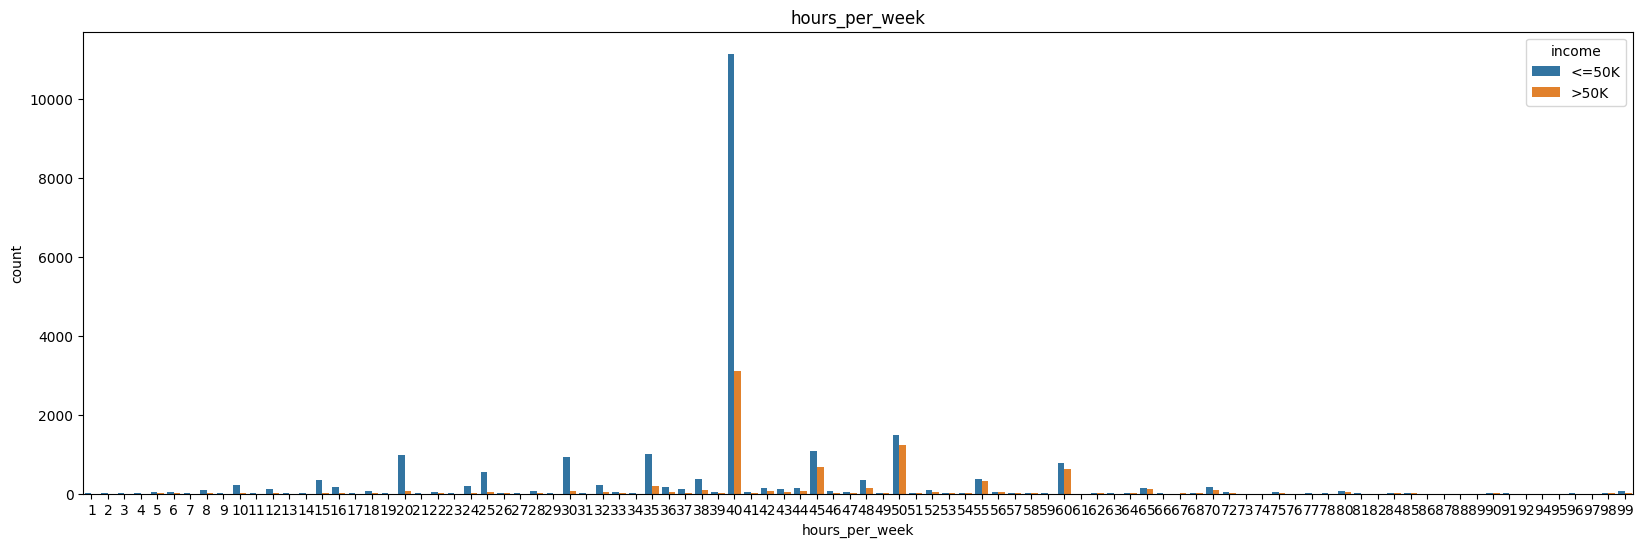

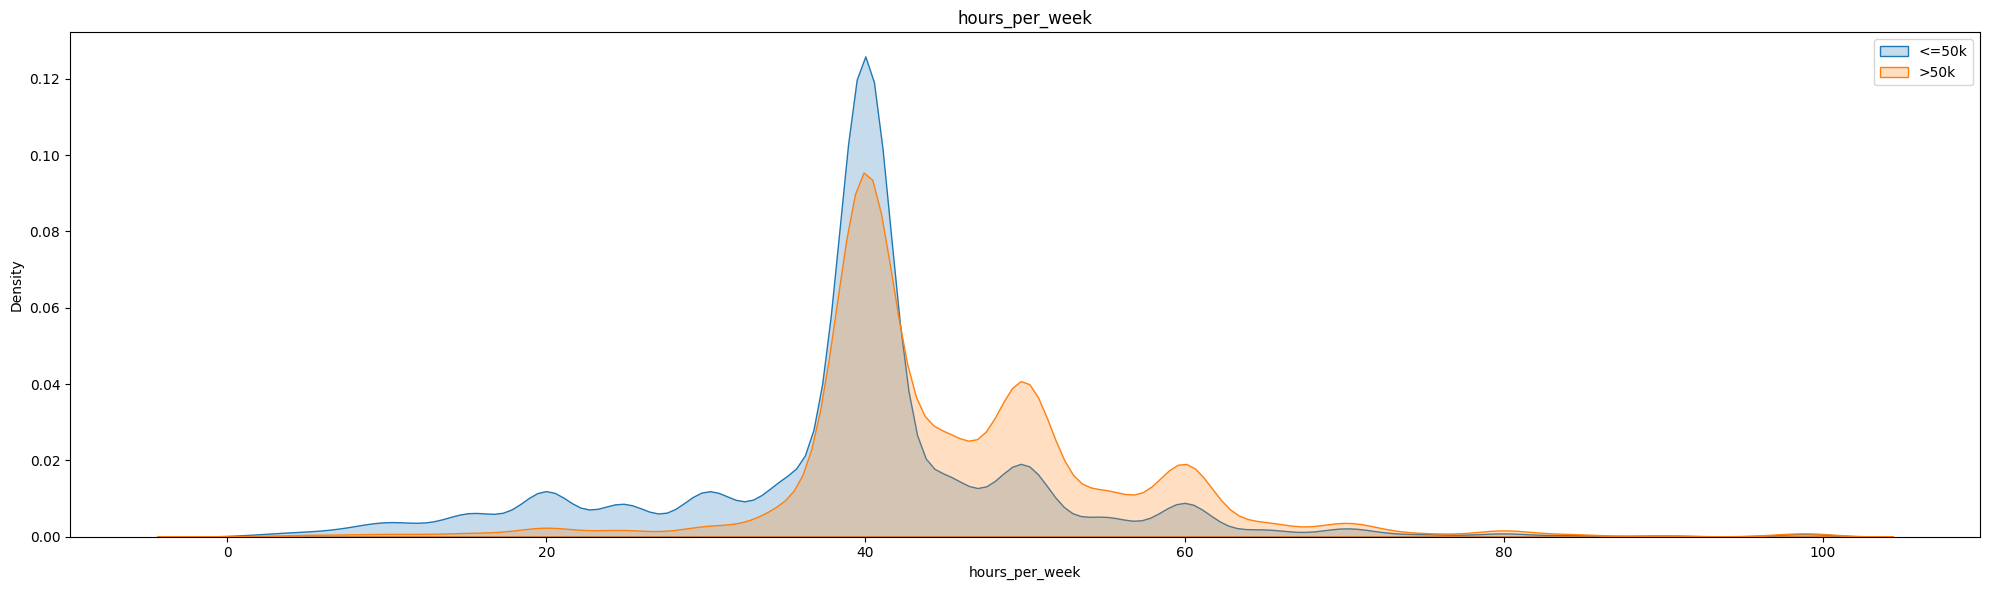

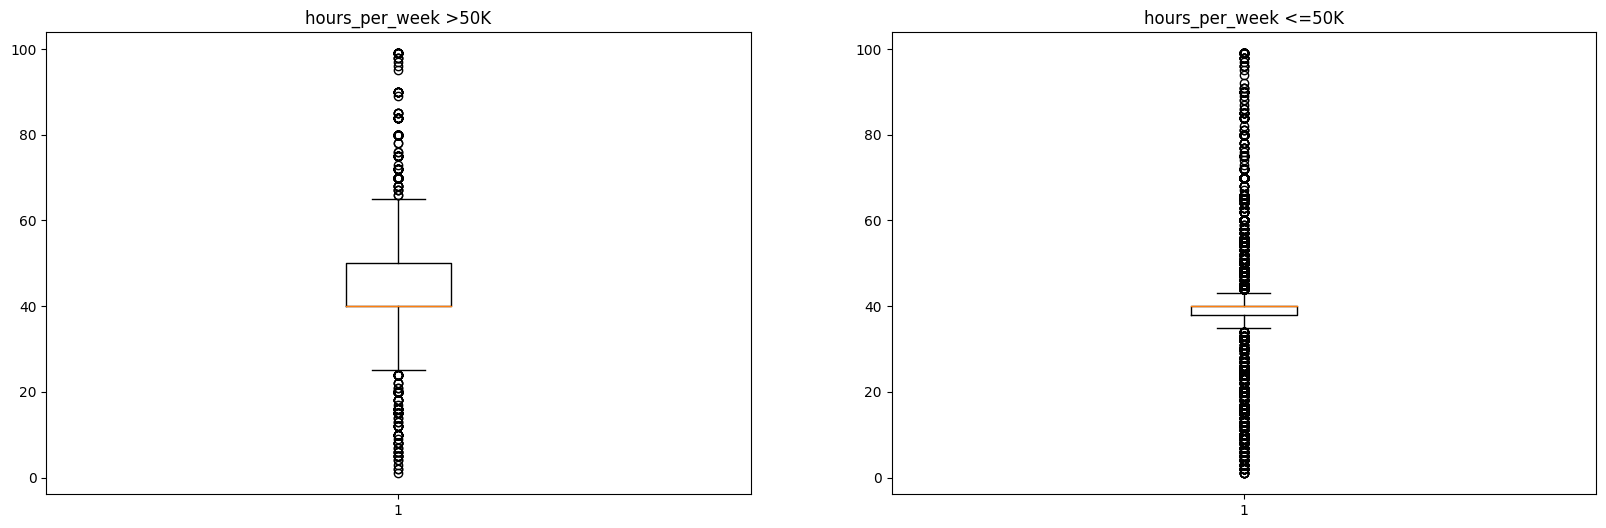

In [9]:
numerical('age')
# numerical('fnlwgt')
numerical('education_num')
numerical('capital_gain')
numerical('capital_loss')
numerical('hours_per_week')

In [11]:
# multivariate analysis
def compare(col1, col2):
    # scatterplot of two variables by income
    fig1 = plt.figure(figsize=(20, 10))
    ax1 = sns.lmplot(x=col1, y=col2, data=data, fit_reg=False, hue='income', legend=True)
    plt.title(col1 +' vs '+ col2)
    plt.show()

<Figure size 2000x1000 with 0 Axes>

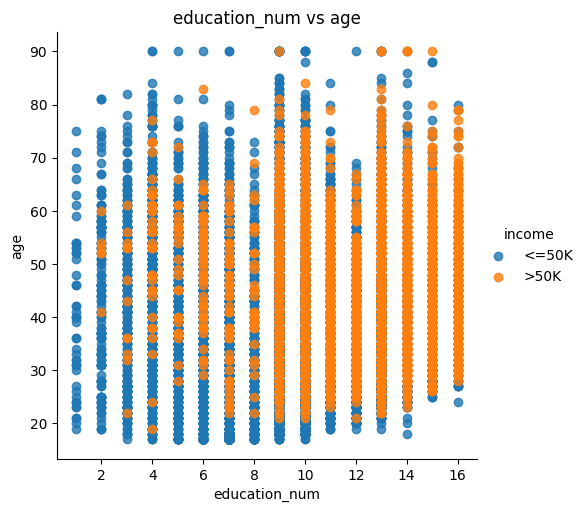

<Figure size 2000x1000 with 0 Axes>

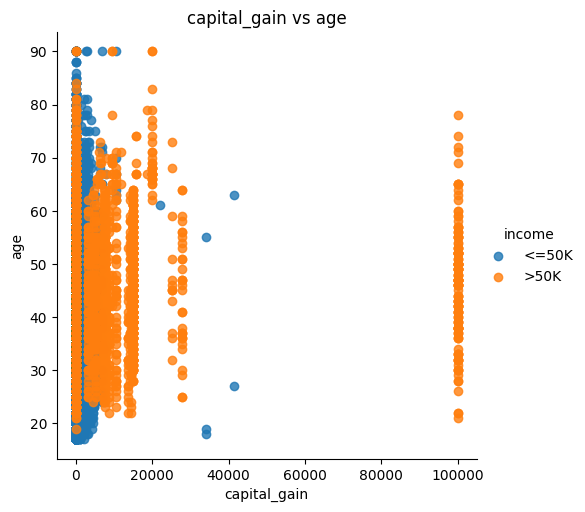

<Figure size 2000x1000 with 0 Axes>

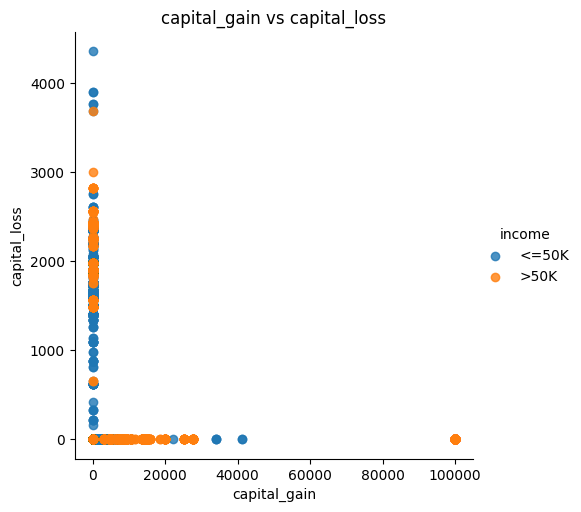

<Figure size 2000x1000 with 0 Axes>

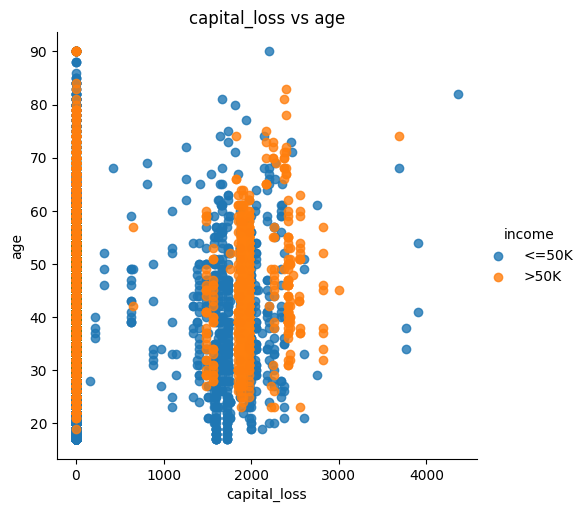

<Figure size 2000x1000 with 0 Axes>

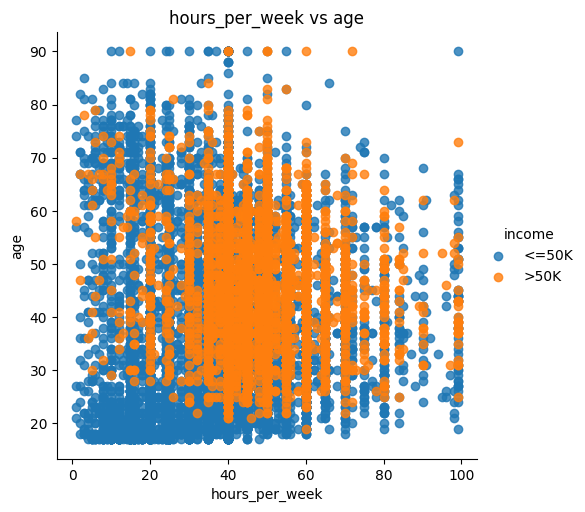

<Figure size 2000x1000 with 0 Axes>

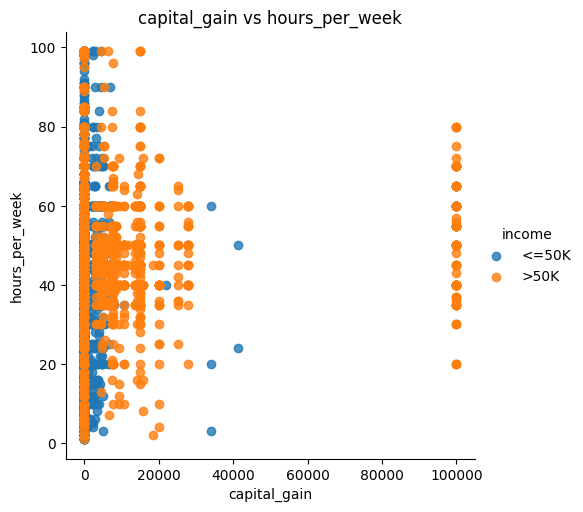

In [12]:
compare('education_num', 'age')
compare('capital_gain', 'age')
compare('capital_gain', 'capital_loss')
compare('capital_loss', 'age')
compare('hours_per_week', 'age')
compare('capital_gain', 'hours_per_week')

In [ ]:
# thoughts so far on important variables:
# numerical - age
# categorical - sex, education, occupation, race???
# need more analysis on categorical
